In [1]:
import pandas as pd
import respy as rp

from auxiliary import plot_final_human_capital
from auxiliary import plot_wage_distribution
from auxiliary import plot_choices

/home/peisenha/local/anaconda3/envs/teaching-microeconometrics/lib/python3.7/site-packages/respy/_numba.py:1: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.cgutils', please update to use 'numba.core.cgutils' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba import cgutils


# Mechanisms and causal explanation

## The dangers of insufficiently deep explanations

We only identify total effects for selected subpopulations that are not necessarily of great economic interest. 

* **Does compulsory school attendance affect schooling and earnings?**

<img src="material/fig-10-1.png" width="500" />
We cannot distinguish between the direct positive effect of schooling on wages and the indirect negative effect through reduced work experience.

* **Lifetime earnings and the Vietnam era draft lottery: Evidence from social security administrative records**

This is the causal graphs that justifies the use of the draft lottery as an instrument to determine the effect of military service on wages.

<img src="material/fig-angrist-1990-valid.png" width="500" />

However, alternatives can be forcefully argued that introduce several problems.

<img src="material/fig-10-2.png" width="500" />

* There is a path from the draft lottery to civilian experience that invalidates the instrument. Why?

* There are four separate causal pathways between military services and wages. 
    * Military service reduces schooling and work experience which reduces wages.
    * Military service reduces schooling, but increases work experience which increases wages.

## The front-door criterion and identification of causal effects by mechanisms

Since $U$ is unobserved, we cannot apply the back-door criterion directly to learn about the effect of $D$ on $Y$.

<img src="material/fig-10-3.png" width="500" />

However, we can make some progress by its repeated application.

#### Front-door criterion

If one or more unblocked bach-door paths connect a causal variable to an outcome variable, the 
causal effect is identified by conditioning on a set of observed variables $\{M\}$, that make up 
an identifying mechanism if

* **Condition 1 (exhaustiveness)** The variables in the set $\{M\}$ intercept all directed paths 
from the causal variable to the outcome variable.

* **Condition 2 (isolation)** No unblocked back-door paths connect the causal variable to the 
variables in the set $\{M\}$, and all back-door paths from the variables in the set $\{M\}$ to 
the outcome variable can be blocked by conditioning on the causal variable.

$\rightarrow$ There is no guidance on on how deep and indentifying mechanism must be in order to be sufficiently deep. This is determined by the standards of a particular research group or field of interest.


<img src="material/fig-10-4.png" width="500" />

## Empirical example

<img src="material/fig-keane-wolpin-1997-cover.png" width="700" />

In this seminal paper, the authors study the mechanisms that determine human capital accumulation. We can reproduce the core findings of the paper using our  group's research code `respy`. For more details, please visit the [online documentation](respy.readthedocs.io/).

### Observed patterns

In [2]:
_, _, df_obs = rp.get_example_model("kw_97_basic")
df_obs.head()

,Identifier,Period,Choice,Wage,Experience_Blue_Collar,Experience_Military,Experience_White_Collar,Experience_School
1,0,0,school,NaN,0,0,0,11
2,0,1,school,NaN,0,0,0,12
3,0,2,school,NaN,0,0,0,13
4,0,3,school,NaN,0,0,0,14
5,0,4,school,NaN,0,0,0,15


We can look at the observed pattern of choices.

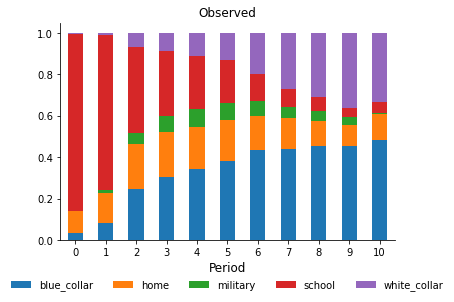

In [3]:
plot_choices(df_obs, "Observed")

### Estimation

Estimation of the model is rather time-consuming so we just take the estimated parameter values as given.

In [4]:
params = pd.read_pickle("material/params_revised.pkl")
params.head()

value  \
category          name                                
delta             delta                    0.785423   
wage_white_collar constant                 8.322815   
                  exp_school               0.098627   
                  exp_white_collar         0.121718   
                  exp_white_collar_square -0.141769   

                                                                                     comment  
category          name                                                                        
delta             delta                                                      discount factor  
wage_white_collar constant                 log of rental price if the base skill endowmen...  
                  exp_school               linear return to an additional year of schooli...  
                  exp_white_collar          return to experience, same sector, linear (wage)  
                  exp_white_collar_square  return to experience, same sector, quadratic (...

Now we can simulate a sample based on them and compare the fit between the observed and the simulated dataset. As the simulation is quite resource-intensive, we will again rely on a prepared dataset.

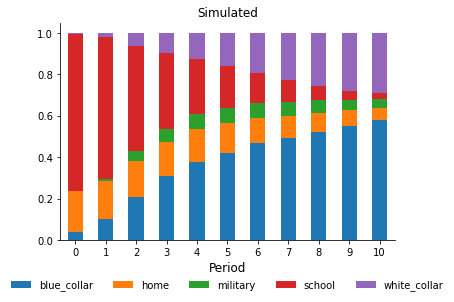

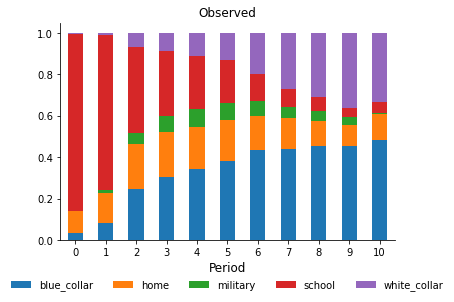

In [5]:
df_sim = pd.read_pickle("material/df_sim.pkl")

for label, df in [("Simulated", df_sim), ("Observed", df_obs)]:
    plot_choices(df, label)

### Causal variation

We can now evalaute the total causal effect of a $\$2,000$ tuition subsidy on average wages in the final period.

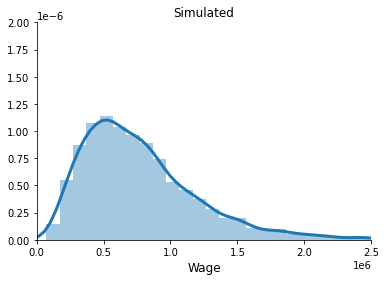

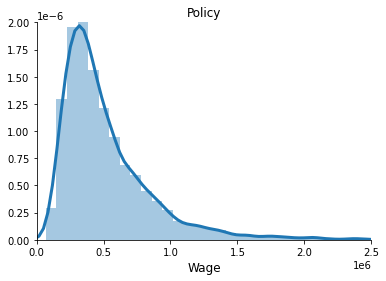

In [6]:
df_pol = pd.read_pickle("material/df_pol.pkl")
plot_wage_distribution(df_sim, df_pol)

### Mechanisms

How do individual decision change so that we observe the change in wages?

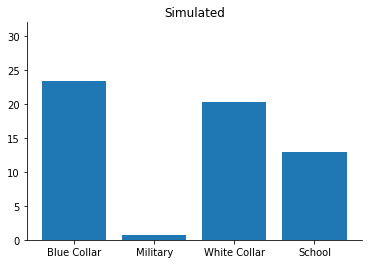

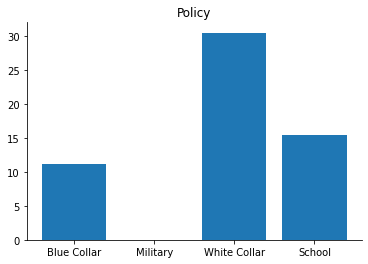

In [7]:
plot_final_human_capital(df_sim, df_pol)